# LAB 2: Spatial Domain Filtering

## 0. Previous imports and global variables

In [24]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from PIL import Image
from scipy.ndimage import filters
from scipy.signal import medfilt2d
import numpy as np
import matplotlib.pyplot as plt
import math as math
import glob
import os
import sys

sys.path.append("../../p1/code") # set the path for visualPercepUtils.py
import visualPercepUtils as vpu

## 1. Exercices

### EXERCICE 1

*Prepare a double-entry table with types of noise and 
types of filters. In each table cell, write how effective 
that  filter is for that  noise. Add some comments or 
notes about the noise level that can be considered, or 
which filter parameters can be adequate, and possible 
“side effects” over the image (e.g. maybe a given filter 
decreases the amount of noise but also has a negative 
impact  on  other  aspects  of  the  image).  Finally,  you 
may include additional comments highlighting the key 
features of each filter, or comparing among them.*

Sepparate methods and main code:

In [25]:
# -----------------------
# Salt & pepper noise
# -----------------------

def addSPNoise(im, percent):
    # Now, im is a PIL image (not a NumPy array)
    # percent is in range 0-100 (%)

    # convert image it to numpy 2D array and flatten it
    im_np = np.array(im)
    im_shape = im_np.shape  # keep shape for later use (*)
    im_vec = im_np.flatten()  # this is a 1D array # https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/

    # generate random locations
    N = im_vec.shape[0]  # number of pixels
    m = int(math.floor(percent * N / 100.0)) # number of pixels corresponding to the given percentage
    locs = np.random.randint(0, N, m)  # generate m random positions in the 1D array (index 0 to N-1)

    # generate m random S/P values (salt and pepper in the same proportion)
    s_or_p = np.random.randint(0, 2, m)  # 2 random values (0=salt and 1=pepper)

    # set the S/P values in the random locations
    im_vec[locs] = 255 * s_or_p  # values after the multiplication will be either 0 or 255

    # turn the 1D array into the original 2D image
    im2 = im_vec.reshape(im_shape) # (*) here is where we use the shape that we saved earlier

    # convert Numpy array im2 back to a PIL Image and return it
    return Image.fromarray(im2)


def testSandPNoise(im, percents):
    imgs = []
    for percent in percents:
        imgs.append(addSPNoise(im, percent))
    return imgs


# -----------------
# Gaussian noise
# -----------------

def addGaussianNoise(im, sd=5):
    return im + np.random.normal(loc=0, scale=sd, size=im.shape)

def testGaussianNoise(im, sigmas):
    imgs = []
    for sigma in sigmas:
        print('testing sigma:', sigma)
        imgs.append(addGaussianNoise(im, sigma))
        print(len(imgs))
    return imgs


# -------------------------
# Average (or mean) filter
# -------------------------

def averageFilter(im, filterSize):
    mask = np.ones((filterSize, filterSize))
    mask = np.divide(mask, np.sum(mask)) # can you think of any alternative for np.sum(mask)?
    return filters.convolve(im, mask)


def testAverageFilter(im_clean, params):
    imgs = []
    for sp_pctg in params['sp_pctg']:
        im_dirty = addSPNoise(im_clean, sp_pctg) # salt and pepper noise
        for filterSize in params['filterSizes']:
            imgs.append(np.array(im_dirty))
            imgs.append(averageFilter(im_dirty, filterSize))
    return imgs


# -----------------
# Gaussian filter
# -----------------

def gaussianFilter(im, sigma=5):
    # im is PIL image
    return filters.gaussian_filter(im, sigma)


def testGaussianFilter(im_clean, params):
    # This function turned out to be too similar to testAverageFilter
    # This is a good sign that code factorization is called for :)
    imgs = []
    for sigma in params['sd_gauss_noise']:
        im_dirty = addGaussianNoise(im_clean, sigma)
        for filterSize in params['sd_gauss_filter']:
            imgs.append(np.array(im_dirty))
            imgs.append(gaussianFilter(im_dirty, filterSize))
    return imgs


# -----------------
# Median filter
# -----------------

def medianFilter(im, filterSize):
    return medfilt2d(im, filterSize)

def testMedianFilter(im_clean, params):
    # This function turned out to be too similar to testAverageFilter
    # This is a good sign that code factorization is called for :)
    imgs = []
    for sp_pctg in params['sp_pctg']:
        im_dirty = addSPNoise(im_clean, sp_pctg)
        for filterSize in params['filterSizes']:
            imgs.append(np.array(im_dirty))
            imgs.append(medianFilter(im_dirty, filterSize))
    return imgs

For comparing the effectiveness of each filter on each noise, we should add some bits of code to the main program. One version for seeing how well a Gaussian filter can filter *SnP* noise an another one for seeing how well an Average filter can filter Gaussian noise

First, we add the necessary methods for missing combinations:

In [30]:
# ----------------
# Testing filters with crossed noise 
# (gauss with salt-pepper / mean with gaussian)
# ----------------

def testGaussianFilterOnSnpNoise(im_clean, params):
    imgs = []
    for sc_ptg in params['sp_pctg']:
        im_dirty = addSPNoise(im_clean, sc_ptg)
        for filterSize in params['sd_gauss_filter']:
            imgs.append(np.array(im_dirty))
            imgs.append(gaussianFilter(im_dirty, filterSize))
    return imgs

def testMedianFilterOnGaussianNoise(im_clean, params):
    imgs = []
    for sigma in params['sd_gauss_noise']:
        im_dirty = addGaussianNoise(im_clean, sigma)
        for filterSize in params['filterSizes']:
            imgs.append(np.array(im_dirty))
            imgs.append(medianFilter(im_dirty, filterSize))
    return imgs

def testAverageFilterOnGaussianNoise(im_clean, params):
    imgs = []
    for sigma in params['sd_gauss_noise']:
        im_dirty = addGaussianNoise(im_clean, sigma) # salt and pepper noise
        for filterSize in params['filterSizes']:
            imgs.append(np.array(im_dirty))
            imgs.append(averageFilter(im_dirty, filterSize))
    return imgs

Testing on ['./imgs-P2/lena256.pgm']
(256, 256)
1
2 None None


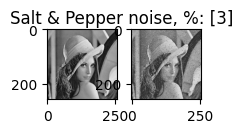

testing sigma: 3
1
testing sigma: 5
2
testing sigma: 10
3
num images 3
3
4 None None


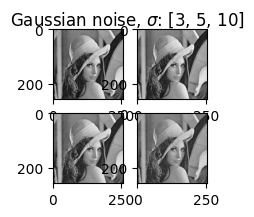

num images

C:\Users\mihaibro\AppData\Local\Temp\ipykernel_41444\613159026.py:62: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  return filters.convolve(im, mask)


 6
6
7 None None


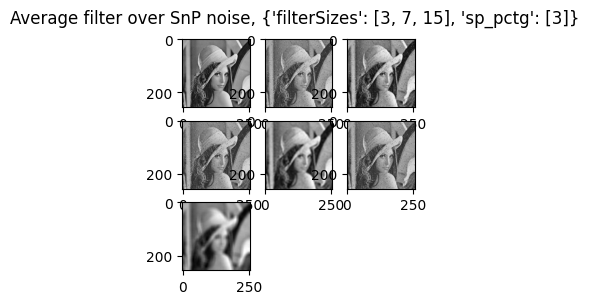

C:\Users\mihaibro\AppData\Local\Temp\ipykernel_41444\613159026.py:81: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  return filters.gaussian_filter(im, sigma)


num images 6
6
7 None None


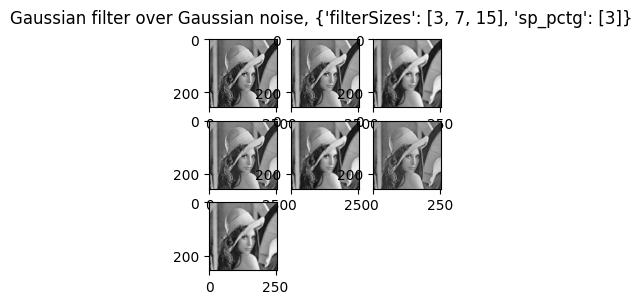

num images 6
6
7 None None


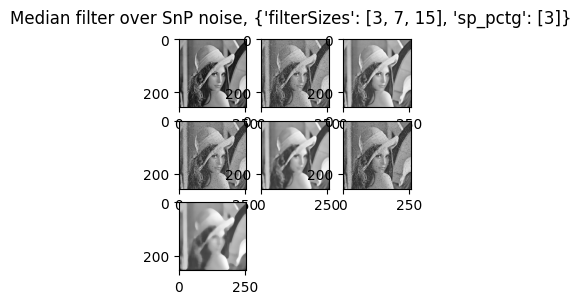

num images 18
18
19 None None


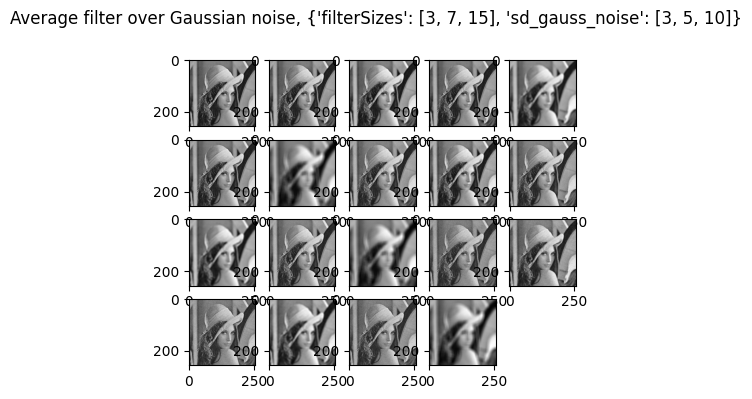

KeyError: 'sd_gauss_filter'

In [29]:

# -----------------
# Test image files
# -----------------

path_input = './imgs-P2/'
path_output = './imgs-out-P2/'
bAllFiles = False
if bAllFiles:
    files = glob.glob(path_input + "*.pgm")
else:
    files = [path_input + 'lena256.pgm']  # lena256, lena512

# --------------------
# Tests to perform
# --------------------

testsNoises = ['testSandPNoise', 'testGaussianNoise']
testsFilters = ['testAverageFilter', 'testGaussianFilter', 'testMedianFilter',
                'testAverageFilterOnGaussianNoise', 'testGaussianFilterOnSnpNoise',
                'testMedianFilterOnGaussianNoise']
bAllTests = True
if bAllTests:
    tests = testsNoises + testsFilters
else:
    tests = ['testSandPNoise']

# -------------------------------------------------------------------
# Dictionary of user-friendly names for each function ("test") name
# -------------------------------------------------------------------

nameTests = {'testGaussianNoise': 'Gaussian noise',
             'testSandPNoise': 'Salt & Pepper noise',
             'testAverageFilter': 'Average filter over SnP noise',
             'testAverageFilterOnGaussianNoise': 'Average filter over Gaussian noise',
             'testGaussianFilter': 'Gaussian filter over Gaussian noise',
             'testGaussianFilterOnSnpNoise': 'Gaussian filter over SnP noise',
             'testMedianFilter': 'Median filter over SnP noise',
             'testMedianFilterOnGaussianNoise': 'Median filter over SnP noise'
             }

bSaveResultImgs = False

# -----------------------
# Parameters of noises
# -----------------------
percentagesSandP = [3]  # ratio (%) of image pixes affected by salt and pepper noise
gauss_sigmas_noise = [3, 5, 10]  # standard deviation (for the [0,255] range) for Gaussian noise

# -----------------------
# Parameters of filters
# -----------------------

gauss_sigmas_filter = [1.2]  # standard deviation for Gaussian filter
avgFilter_sizes = [3, 7, 15]  # sizes of mean (average) filter
medianFilter_sizes = [3, 7, 15]  # sizes of median filter

testsUsingPIL = ['testSandPNoise']  # which test(s) uses PIL images as input (instead of NumPy 2D arrays)


# -----------------------------------------
# Apply defined tests and display results
# -----------------------------------------

def doTests():
    print("Testing on", files)
    for imfile in files:
        im_pil = Image.open(imfile).convert('L')
        im = np.array(im_pil)  # from Image to array

        for test in tests:

            if test == "testGaussianNoise":
                params = gauss_sigmas_noise
                subTitle = r", $\sigma$: " + str(params)
            elif test == "testSandPNoise":
                params = percentagesSandP
                subTitle = ", %: " + str(params)
            elif test == "testAverageFilter":
                params = {}
                params['filterSizes'] = avgFilter_sizes
                params['sp_pctg'] = percentagesSandP
                subTitle = ", " + str(params)
            elif test == "testAverageFilterOnGaussianNoise":
                params = {}
                params['filterSizes'] = avgFilter_sizes
                params['sd_gauss_noise'] = gauss_sigmas_noise
                subTitle = ", " + str(params)
            elif test == "testMedianFilter":
                params = {}
                params['filterSizes'] = medianFilter_sizes
                params['sp_pctg'] = percentagesSandP
                subTitle = ", " + str(params)
            elif test == "testMedianFilterOnGaussianNoise":
                params = {}
                params['filterSizes'] = medianFilter_sizes
                params['sd_gauss_noise'] = gauss_sigmas_noise
                subTitle = ", " + str(params)
            elif test == "testGaussianFilter":
                params = {}
                params['sd_gauss_noise'] = gauss_sigmas_noise
                params['sd_gauss_filter'] = gauss_sigmas_filter
                # subTitle = r", $\sigma_n$ (noise): " + str(gauss_sigmas_noise) + ", $\sigma_f$ (filter): " + str(gauss_sigmas_filter) #DECOMENT
            elif test == "testGaussianFilterOnSnpNoise":
                params = {}
                params['sd_gauss_noise'] = gauss_sigmas_noise
                params['sp_pctg'] = percentagesSandP
                # subTitle = r", $\sigma_n$ (noise): " + str(gauss_sigmas_noise) + ", $\sigma_f$ (filter): " + str(gauss_sigmas_filter) #DECOMENT
            if test in testsUsingPIL:
                outs_pil = eval(test)(im_pil, params)
                outs_np = vpu.pil2np(outs_pil)
            else:
                # apply test to given image and given parameters
                outs_np = eval(test)(im, params)
                print("num images", len(outs_np))
            print(len(outs_np))
            # display original image, noisy images and filtered images
            vpu.showInGrid([im] + outs_np, title=nameTests[test] + subTitle)

doTests()

    